# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**Caution: This notebook was AI-generated and has not been fully verified. You should carefully check all code and results before drawing any scientific conclusions.** Data and methods may require further validation for your particular use-case.


## Overview

This notebook provides an introduction to [Dandiset 001361, version 0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045):

**Title:** A flexible hippocampal population code for experience relative to reward  
**Description:**  
2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

- Keywords: hippocampus, navigation, learning, memory, 2-photon imaging, place cells
- Techniques: two-photon microscopy, analytical technique, behavioral, surgical

**Summary:**  
Mice navigated virtual environments with shifting reward locations while hippocampal activity was imaged. The data allow researchers to explore how reward-related representations evolve during learning and navigation.

**Citation:**  
Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025) *A flexible hippocampal population code for experience relative to reward* (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045

---


## What this notebook covers

- Introduction to the Dandiset and its structure
- Listing and exploring NWB file assets
- Loading an NWB file directly from DANDI (with **no need to download the full file locally**)
- Surveying the types of data available in the NWB file (behavioral, imaging, etc.)
- Visualizing sample behavioral and two-photon imaging data
- Providing resources and code examples to help you start your own analyses

**Note:** The analyses here illustrate how to access and load the data. If you wish to replicate or extend these analyses, we strongly encourage you to review all code and understand the data structures.


## Required packages (assumed pre-installed)

- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `pandas`
- `numpy`
- `seaborn`

(Do not run any installation commands in this notebook.)

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()


## Listing assets in the Dandiset

Let's connect to the DANDI archive and briefly list the first few data assets available in this Dandiset. The DANDI API client is convenient for inspecting datasets and assets.

In [2]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}\n")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

First 5 assets:
- sub-m11/sub-m11_ses-05_behavior+ophys.nwb (ID: a22cc1da-b5e8-4fea-a770-7b83a6e79656)
- sub-m11/sub-m11_ses-04_behavior+ophys.nwb (ID: b53ef825-89ca-483e-abeb-b38a0ae9293c)
- sub-m11/sub-m11_ses-07_behavior+ophys.nwb (ID: 27481b95-aeb2-4108-b7ac-b3859892da7a)
- sub-m11/sub-m11_ses-06_behavior+ophys.nwb (ID: 5a5da0ea-5e7a-497b-a3aa-7e6ee1628bde)
- sub-m11/sub-m11_ses-08_behavior+ophys.nwb (ID: d4e069d6-40f6-4702-92d4-70abfd65c1bd)



## Selecting an NWB file for inspection

We'll focus on one NWB file for this demonstration:

**File path:** `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`  
**Asset ID:** `d77ea78a-8978-461d-9d11-3c5cef860d82`

**Download URL:**  
`https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/`

You can [explore this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft).


## Loading the NWB file (streamed, not downloaded)

We use PyNWB's streaming capability via `remfile` and `h5py`:
- The NWB data is accessed remotely via its direct DANDI asset URL.
- Be mindful that reading large datasets will result in substantial network access time—prefer loading manageable slices/subsets for visualization.

The cell below loads the NWB file and explores high-level metadata and groups.

In [3]:
import pynwb
import h5py
import remfile

# Stream the NWB file from the DANDI asset URL
url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject ID:", getattr(nwb.subject, 'subject_id', None))
print("Species:", getattr(nwb.subject, 'species', None))
print("Experimenter:", nwb.experimenter)
print("Identifiers:", nwb.identifier)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: processed suite2p data
Session start time: 2023-02-23 00:00:00-08:00
Subject ID: m11
Species: Mus musculus
Experimenter: ('Mari Sosa',)
Identifiers: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A


## Overview of NWB data structure

The NWB file contains several types of data:

- **Acquisition:**  
  - `TwoPhotonSeries`: Raw two-photon imaging data (small test block in this file)

- **Processing modules:**
  - `behavior` (BehavioralTimeSeries: includes, e.g., reward, environment, lick, position, speed, trial number, etc.)
  - `ophys` (Fluorescence, Deconvolved signals, ROI segmentation)

Example data interfaces and key datasets:

```
⮡ nwb.acquisition['TwoPhotonSeries'] → Two-photon imaging frames
⮡ nwb.processing['behavior']['BehavioralTimeSeries']['lick/data'], ['position/data'], ['speed/data'], etc.
⮡ nwb.processing['ophys']['Fluorescence']['plane0/data'] → Fluorescence traces per cell
⮡ nwb.processing['ophys']['Deconvolved']['plane0/data'] → Deconvolved traces per cell
```

We'll explore and visualize a few representative data types below.

### High-level summary of available behavioral time series

The following are available as labeled time series (all with shape `(20684,)`):

| Name          | Description                                                   | Units       |
|---------------|--------------------------------------------------------------|-------------|
| `lick`        | Lick detection by capacitive sensor (cumulative)             | AU          |
| `position`    | Position in virtual linear track                             | cm          |
| `speed`       | Speed of the subject                                         | cm/s        |
| `environment` | Virtual reality environment                                  | AU          |
| `reward_zone` | Reward zone entry (binary)                                   | integer     |
| `trial number`| Trial number, each trial is a lap                            | integer     |
| `trial_start` | Start of trial                                               | integer     |
| `reward`      | Reward delivery events                                       | mL          |
| `autoreward`  | Whether trial was automatically rewarded (if failed to lick) | integer     |
| `scanning`    | Whether ophys scanning occurred                              | integer     |
| `teleport`    | End of trial (entry to ITI)                                  | integer     |

### Example: Visualizing behavioral data from a single session

Below, we plot a brief segment (first 1000 samples) of the **position**, **speed**, and **lick** signals.
This is just for demonstration—these signals are available for the entire session (over 20,000 samples).

(These are read as HDF5 datasets and converted to NumPy arrays for efficient subsetting.)

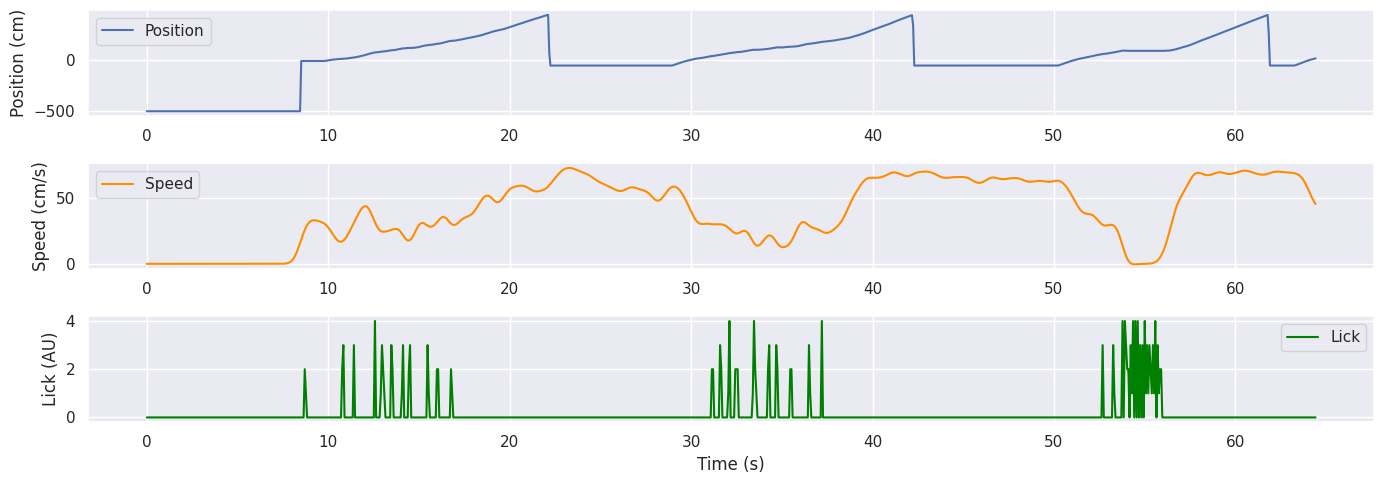

In [4]:
behavior_ts = nwb.processing['behavior']['BehavioralTimeSeries'].time_series

# Load first 1000 samples for key time series
N = 1000
position = behavior_ts['position'].data[:N]
position_t = behavior_ts['position'].timestamps[:N]
speed = behavior_ts['speed'].data[:N]
lick = behavior_ts['lick'].data[:N]

plt.figure(figsize=(14, 5))
plt.subplot(3, 1, 1)
plt.plot(position_t, position, label='Position')
plt.ylabel('Position (cm)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(position_t, speed, label='Speed', color='darkorange')
plt.ylabel('Speed (cm/s)')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(position_t, lick, label='Lick', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Lick (AU)')
plt.legend()
plt.tight_layout()
plt.show()

### Example: Mean fluorescence traces for a subset of cells

Here we load and plot the first 1000 time points for the mean fluorescence traces of the first 5 cells (ROIs) from the processed ("dF/F") data (`Fluorescence/plane0`).

Be aware that this is a small subset for illustration; the full data has 19818 timepoints and 349 ROIs.

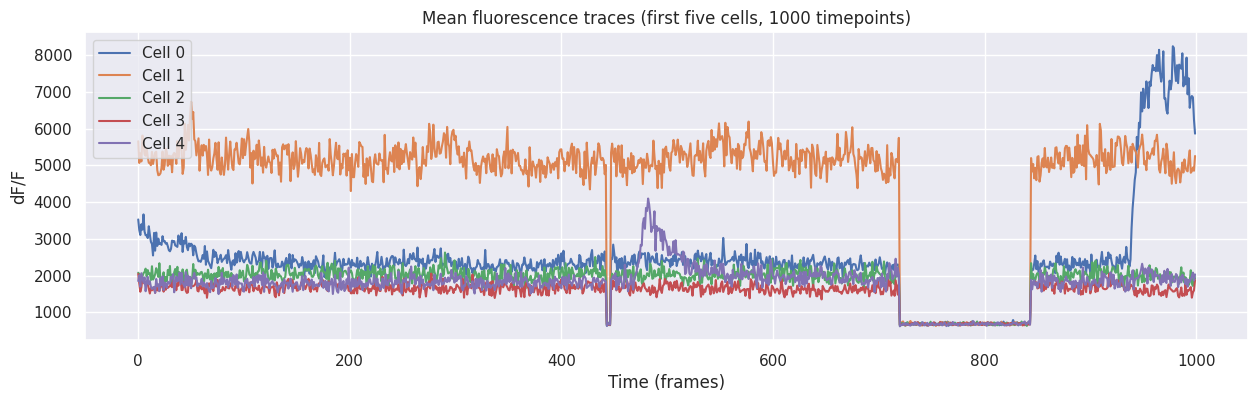

In [5]:
# Get processed calcium traces
fluorescence = nwb.processing['ophys']['Fluorescence']
r = fluorescence.roi_response_series['plane0']
fluor_data = r.data[:1000, :5]  # (time, cell)

plt.figure(figsize=(15, 4))
for i in range(fluor_data.shape[1]):
    plt.plot(fluor_data[:, i], label=f'Cell {i}')
plt.xlabel('Time (frames)')
plt.ylabel('dF/F')
plt.title('Mean fluorescence traces (first five cells, 1000 timepoints)')
plt.legend()
plt.show()

### Example: ROI segmentation summary

Let's briefly describe how to access ROI segmentation data and tabulate ROI and cell counts. (We'll display the head of the DataFrame for the segmentation table.)

In [6]:
plane_seg = nwb.processing['ophys']['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
seg_df = plane_seg.to_dataframe()
print(f"Number of ROIs: {len(seg_df)}")
print(seg_df.head())

Number of ROIs: 349
                                           pixel_mask  \
id                                                      
0   [[136, 471, 11.239327], [136, 472, 12.38877], ...   
1   [[164, 400, 15.628908], [164, 401, 17.650463],...   
2   [[209, 552, 16.836023], [209, 553, 18.55048], ...   
3   [[161, 537, 13.172347], [161, 538, 12.249123],...   
4   [[148, 458, 13.488646], [148, 459, 21.197554],...   

                        iscell  planeIdx  
id                                        
0   [0.0, 0.49814834778690403]         0  
1    [0.0, 0.8500147314559483]         0  
2    [1.0, 0.6779582307988627]         0  
3    [1.0, 0.8864013707883429]         0  
4     [1.0, 0.870102957697157]         0  


## Summary and suggested next steps

In this notebook, we:
- Surveyed the overall structure and purpose of Dandiset 001361
- Listed and inspected available NWB assets
- Loaded a streamed NWB file using PyNWB
- Visualized key behavioral and imaging data for a brief segment/cell subset
- Demonstrated how to access fluorescence traces and ROI segmentation tables

**Where to go next?**
- Drill down into trial structure, e.g., compare across laps or reward zones.
- Analyze more ROIs and/or the full recorded traces.
- Examine relationships between behavioral events (lick, reward, locomotion) and neural activity.
- Use [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=draft) for interactive data exploration and visualization.

**Reminder:** This notebook provides an overview and demonstration—always double-check code and methods before using in your own analyses or drawing scientific conclusions.